In [157]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [158]:

# Read in troop data into DataFrame
df = pd.read_csv("troop_movements.csv")


In [159]:

er_counts = df.value_counts('empire_or_resistance').reset_index()
er_counts

,empire_or_resistance,count
0,empire,530
1,resistance,470


In [160]:
hw_counts = df.value_counts('homeworld').reset_index()
hw_counts

,homeworld,count
0,Iktotch,35
1,Cerea,34
2,Vulpter,32
3,Muunilinst,31
4,Champala,29
5,Umbara,29
6,Quermia,29
7,Glee Anselm,28
8,Stewjon,27
9,Iridonia,27


In [161]:
unit_type_counts = df.value_counts('unit_type').reset_index()
unit_type_counts

,unit_type,count
0,x-wing,153
1,tie_silencer,145
2,at-st,126
3,resistance_soldier,122
4,stormtrooper,120
5,at-at,115
6,unknown,113
7,tie_fighter,106


In [162]:
df['is_resistance'] = [True if x == 'resistance' else False for x in df['empire_or_resistance']]
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-20 16:38:00,1,at-st,empire,8,2,9,10,Shili,False
1,2024-05-20 16:37:59,2,at-at,empire,2,3,1,10,Shili,False
2,2024-05-20 16:37:58,3,stormtrooper,resistance,9,4,5,6,Skako,True
3,2024-05-20 16:37:57,4,at-st,resistance,3,3,10,8,Cerea,True
4,2024-05-20 16:37:56,5,tie_silencer,empire,2,6,1,2,Umbara,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-05-20 16:21:25,996,at-st,resistance,4,9,3,4,Socorro,True
996,2024-05-20 16:21:24,997,x-wing,resistance,7,9,8,8,Toydaria,True
997,2024-05-20 16:21:23,998,stormtrooper,empire,3,7,4,7,Trandosha,False
998,2024-05-20 16:21:22,999,unknown,resistance,10,5,6,4,Haruun Kal,True


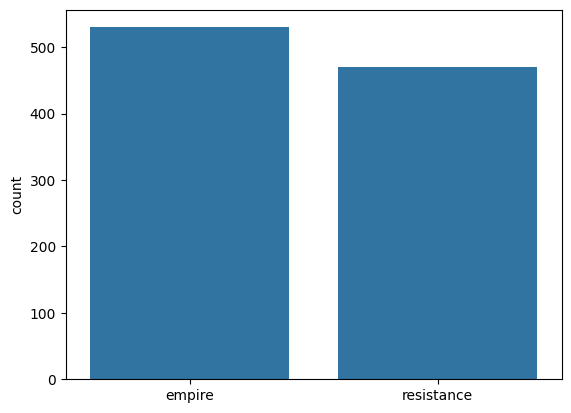

In [163]:
# Create Bar Plot
plot = sns.barplot(
    data= er_counts,
    x= ['empire', 'resistance'],
    y= 'count')

In [164]:
# Define the features and target variable

X = df[['unit_type','homeworld']]  # Features
X = pd.get_dummies(X, columns=['unit_type', 'homeworld'])
y = df['empire_or_resistance']  # Target variable
X

,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing,homeworld_Alderaan,homeworld_Aleen Minor,...,homeworld_Sullust,homeworld_Tatooine,homeworld_Tholoth,homeworld_Toydaria,homeworld_Trandosha,homeworld_Troiken,homeworld_Tund,homeworld_Umbara,homeworld_Vulpter,homeworld_Zolan
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
997,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
998,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of train and test sets
print("train_test_split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 50)
X_test shape: (200, 50)
y_train shape: (800,)
y_test shape: (200,)


In [166]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.48
